In [4]:
import pandas as pd

imdb = pd.read_csv('https://raw.githubusercontent.com/JoaoPedro-Ramos/Data-Science_Movies/master/imdb-5000-movie-dataset/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
imdb['color'].unique() # No dataframe imdb pegue a coluna 'color' e mostre os valores unicos

array(['Color', nan, ' Black and White'], dtype=object)

In [9]:
imdb['color'].value_counts() # total de valores com 'Color' e 'Black and White'
imdb['color'].value_counts(normalize=True) # porcentagem referente a cada valor: 'Color': 95% dos dados ; 'Black and White': 04% dos dados

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [11]:
imdb['director_name'].value_counts() # quantidade de filmes de cada diretor no dataframe

Steven Spielberg         26
Woody Allen              22
Clint Eastwood           20
Martin Scorsese          20
Ridley Scott             17
                         ..
Neema Barnette            1
Gareth Evans              1
Lucile Hadzihalilovic     1
Laurent Cantet            1
Francesca Gregorini       1
Name: director_name, Length: 2398, dtype: int64

In [17]:
imdb['num_critic_for_reviews'].describe()  # descrição da coluna 'num_critic_for_reviews' 

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

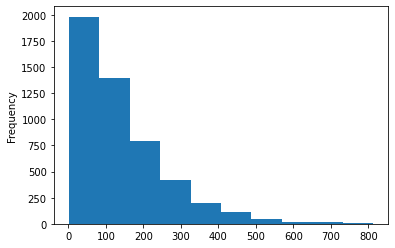

In [22]:
imdb['num_critic_for_reviews'].plot(kind='hist') # plotando dados da coluna 'num_critic_for_reviews'

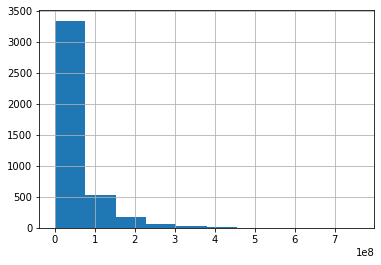

In [25]:
imdb['gross'].hist() # plotando grafico do tipo histograma da coluna 'gross'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


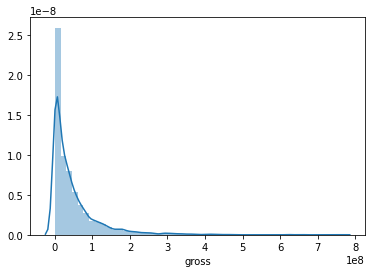

In [26]:
import seaborn as sns

sns.distplot(imdb['gross']) # mesma coisa do de cima 

In [29]:
imdb.sort_values('gross', ascending=False).sample(10) # ordenou em ordem decrescente a partir da coluna 'gross' e pegou 10 exemplos aleatóórios

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
982,Color,Joe Dante,105.0,106.0,287.0,767.0,Robert Picardo,16000.0,41482207.0,Comedy|Fantasy|Horror,Christopher Lee,Gremlins 2: The New Batch,68428,19610,Phoebe Cates,0.0,gremlin|horror host|hulk hogan|monster|skyscraper,http://www.imdb.com/title/tt0099700/?ref_=fn_t...,148.0,English,USA,PG-13,50000000.0,1990.0,823.0,6.3,1.85,0
1392,Color,Mikael Håfström,267.0,114.0,101.0,2000.0,Colin O'Donoghue,12000.0,33037754.0,Drama|Horror|Mystery|Thriller,Anthony Hopkins,The Rite,75864,19904,Toby Jones,1.0,demon|exorcism|exorcist|faith|seminary,http://www.imdb.com/title/tt1161864/?ref_=fn_t...,197.0,English,USA,PG-13,37000000.0,2011.0,3000.0,6.0,2.35,23000
2664,Color,Woody Allen,278.0,119.0,11000.0,400.0,Mark Gatiss,19000.0,23089926.0,Drama|Romance|Thriller,Scarlett Johansson,Match Point,166269,20391,Penelope Wilton,3.0,extramarital affair|infidelity|irony of fate|s...,http://www.imdb.com/title/tt0416320/?ref_=fn_t...,735.0,English,UK,R,15000000.0,2005.0,567.0,7.7,1.85,0
2707,Color,David Raynr,50.0,94.0,9.0,612.0,Jodi Lyn O'Keefe,11000.0,8735529.0,Comedy|Drama|Romance,James Franco,Whatever It Takes,8055,13524,Marla Sokoloff,4.0,male objectification|manipulative behavior|mod...,http://www.imdb.com/title/tt0202402/?ref_=fn_t...,89.0,English,USA,PG-13,15000000.0,2000.0,897.0,5.5,1.85,816
4716,Color,Lance McDaniel,NaN,90.0,0.0,271.0,Steven Michael Quezada,595.0,NaN,Action|Drama|Thriller,Russell Wong,Light from the Darkroom,6,1754,Lymari Nadal,0.0,china|faith|panama|photography|suspense,http://www.imdb.com/title/tt3130704/?ref_=fn_t...,1.0,English,USA,PG-13,600000.0,2014.0,412.0,8.0,NaN,9
4854,Color,Ken Del Conte,NaN,90.0,2.0,99.0,Robert Miano,466.0,NaN,Action|Adventure|Mystery|Romance|Thriller,Hector Echavarria,Death Calls,30,842,Ron Roggé,2.0,murder|oppression|rebirth|reincarnation|revenge,http://www.imdb.com/title/tt1328873/?ref_=fn_t...,NaN,English,USA,R,290000.0,2010.0,216.0,4.3,1.85,16
2584,Color,Danny Boyle,393.0,101.0,0.0,888.0,Spencer Wilding,3000.0,2319187.0,Crime|Drama|Mystery|Thriller,Rosario Dawson,Trance,92640,5056,Tuppence Middleton,0.0,amnesia|criminal|heist|hypnotherapy|lost painting,http://www.imdb.com/title/tt1924429/?ref_=fn_t...,212.0,English,UK,R,20000000.0,2013.0,1000.0,7.0,2.35,23000
362,Color,Tony Bancroft,143.0,88.0,7.0,484.0,Harvey Fierstein,2000.0,120618403.0,Adventure|Animation|Family|Fantasy|Musical|War,Ming-Na Wen,Mulan,171792,4478,June Foray,0.0,based on poem|based on true story|china|one wo...,http://www.imdb.com/title/tt0120762/?ref_=fn_t...,222.0,English,USA,G,90000000.0,1998.0,500.0,7.5,1.66,12000
3062,Color,Mira Nair,15.0,113.0,300.0,787.0,Chazz Palminteri,1000.0,2832826.0,Comedy|Drama|Romance,Anjelica Huston,The Perez Family,1761,3072,Vincent Gallo,2.0,immigration|love|political prisoner|reference ...,http://www.imdb.com/title/tt0114113/?ref_=fn_t...,19.0,English,USA,R,11000000.0,1995.0,979.0,6.2,1.85,174
2157,Color,Adam Shankman,121.0,105.0,163.0,338.0,Kimberly J. Brown,1000.0,132541238.0,Comedy,Angus T. Jones,Bringing Down the House,30058,2505,Steve Harris,2.0,divorce|lawyer|spanking|villain arrested|wrong...,http://www.imdb.com/title/tt0305669/?ref_=fn_t...,236.0,English,USA,PG-13,33000000.0,2003.0,409.0,5.5,2.35,800


# Perguntas Gerais

- aventura tem nota melhor que comédia?
- diretor com mais filmes tem notas melhores? tem mais faturamento?
- as respostas são especificas para a amostra ou para o mundo?
- quais as correlações entre os dados?
- budget x gross (orçamento x faturamento)
- title_year com algo?


In [35]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']") # pega todos os valores da coluna 'color' que forem 'Color' ou 'Black and White' e cria um dataframe chamado color_or_bw.
len(color_or_bw)

5024

In [36]:
# criamos uma coluna no dataframe color_or_bw chamada color_0_ou_1, esta recebe o valor da coluna 'color' se ele for igual ao valor 'Color", se for 'Color' recebe 1, se for 'Black and White' recebe 0.
color_or_bw['color_0_ou_1'] = (color_or_bw['color'] == 'Color') * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [39]:
color_or_bw['color_0_ou_1'].value_counts() # quantidade total de 1 (Color) e 0 (Black and White)

1    4815
0     209
Name: color_0_ou_1, dtype: int64

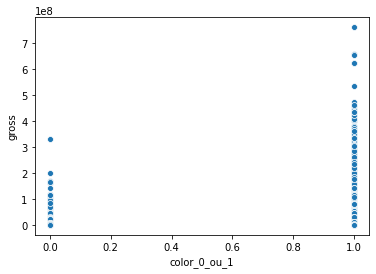

In [42]:
# plotamos um gráfico de dispersão onde o data será o dataframe 'color_or_bw', o x será a coluna 'color_0_ou_1', e o y será a coluna 'gross'.
# dessa forma vemos a relação de faturamento (gross) com o fato do filme ser ou não colorido.
sns.scatterplot(data=color_or_bw, x='color_0_ou_1', y='gross')

In [45]:
# agrupamos a coluna 'color' do dataframe 'color_or_bw' e pegamos a média de faturamento (gross) cada valor unico (Color, Black and White)
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [58]:
# agrupamos a coluna 'color' do dataframe 'color_or_bw' e pegamos a média de notas (imdb_score) cada valor unico (Color, Black and White)
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [61]:
# mesma coisa do de cima porém com o valor da mediana ao invés da média
color_or_bw.groupby('color').median()['imdb_score']

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

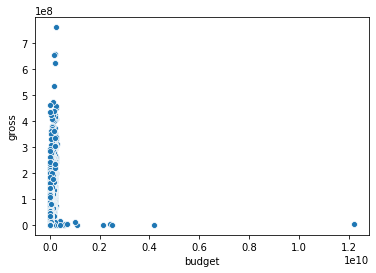

In [66]:
# no dataframe imdb pegamos as colunas: budget e gross, removemos todas as linhas com NaN (vazias/sem valor) e plotamos com seaborn (sns)
# na query, tiramos quem tem budget menor que 0 e gross menor que 0 (ou seja, pegamos apenas os valores de ambos que são maiores que 0)
relacao_budget_x_gross = imdb[['budget', 'gross']].dropna().query('budget > 0 or gross > 0')
sns.scatterplot(x='budget', y='gross', data=relacao_budget_x_gross)

In [68]:
imdb.sort_values('budget', ascending=False).head() # ordenando em ordem decrescente pela coluna budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


In [69]:
imdb['country'].unique() # todos os países que existem em nosso dataframe imdb

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [0]:
imdb = imdb.drop_duplicates() # removemos todas as linhas duplicadas

In [77]:
imdb_usa = imdb.query('country == "USA"')
imdb_usa.sort_values('budget', ascending=False).head() # ordenando em ordem decrescente pela coluna budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


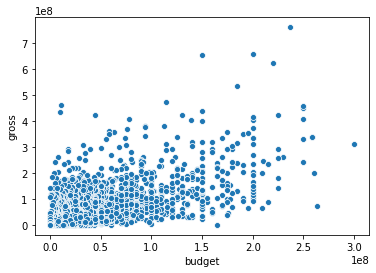

In [78]:
# no dataframe imdb_usa (considerando apenas os filmes estadunidenses )pegamos as colunas: budget e gross, removemos todas as linhas com NaN (vazias/sem valor) e plotamos com seaborn (sns)
# na query, tiramos quem tem budget menor que 0 e gross menor que 0 (ou seja, pegamos apenas os valores de ambos que são maiores que 0)
relacao_budget_x_gross = imdb_usa[['budget', 'gross']].dropna().query('budget > 0 or gross > 0')
sns.scatterplot(x='budget', y='gross', data=relacao_budget_x_gross)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


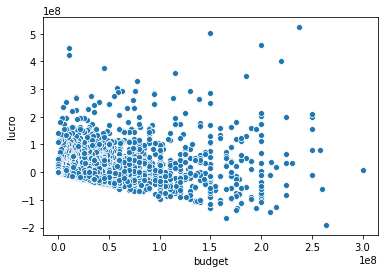

In [81]:
# lucro / prejuizo

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

relacao_budget_x_lucro = imdb_usa[['budget', 'lucro']].dropna().query('budget > 0 or lucro > 0')
sns.scatterplot(x='budget', y='lucro', data=relacao_budget_x_lucro)

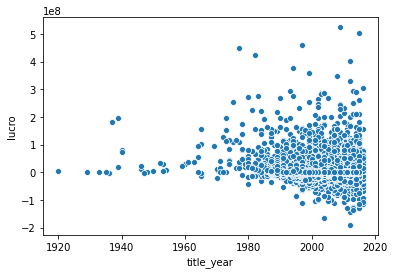

In [84]:
# prejuizo por ano

relacao_budget_x_lucro = imdb_usa[['title_year', 'lucro']].dropna().query('title_year > 0 or lucro > 0')
sns.scatterplot(x='title_year', y='lucro', data=relacao_budget_x_lucro)

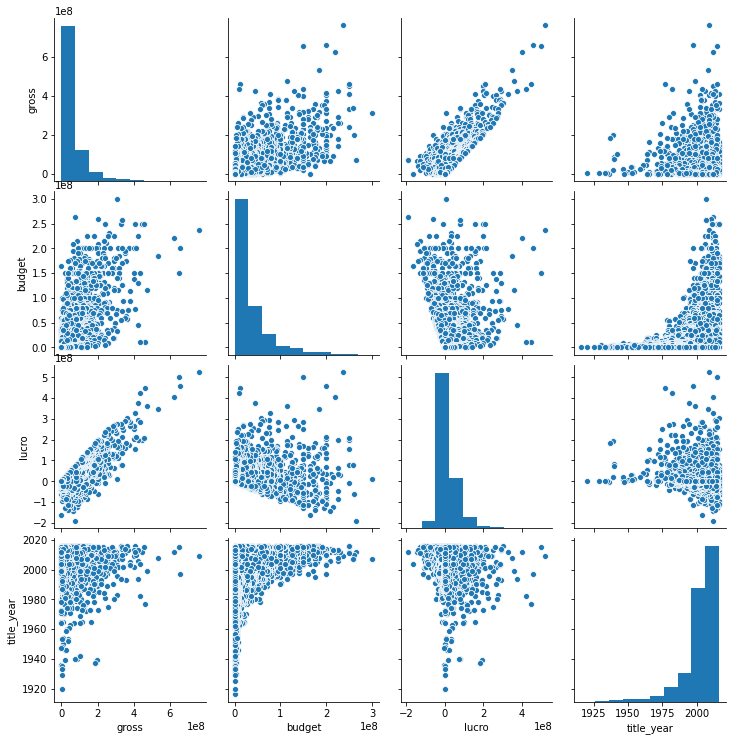

In [86]:
sns.pairplot(data = imdb_usa[['gross', 'budget', 'lucro', 'title_year']]) # plot de todos

In [88]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr() # numeros da correlação entre os valores, quanto maior o numero maior a correlação, ex: quanto maior o gross (faturamento) maior o lucro.

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000
